## Imports

In [2]:
import util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import colors

def get_models_epochs(file_dict):
    row = []
    for alias, file_path in file_dict.items():
        folder = str(file_path).split('/')[:-1]
        ckp1 = '/'.join(folder)+'/'+folder[-1]+'_best.pth'
        if alias == "$S_2$":
            ckp2 = '/'.join(folder)+'/'+folder[-1]+'_119.pth'
        else:
            ckp2 = '/'.join(folder)+'/'+folder[-1]+'_curr.pth'
        epoch1 = util.get_checkpoint_epoch(ckp1)
        epoch2 = util.get_checkpoint_epoch(ckp2)
        row.append((alias, epoch1, epoch2))
    return pd.DataFrame(row, columns =['Name', 'best', 'curr'])

## Dataset

In [6]:
util.dataset_info('data/p2')

,split,classes,size,kn size,kn (%),kn_unk size,kn_unk (%),unk_unk size,unk_unk (%)
0,train,32,60684,31053,51.2%,29631,48.8%,0,0.0%
1,val,32,15178,7765,51.2%,7413,48.8%,0,0.0%
2,test,33,5800,1550,26.7%,1500,25.9%,2750,47.4%


## Attachment Basic Entropic and Objectosphere training

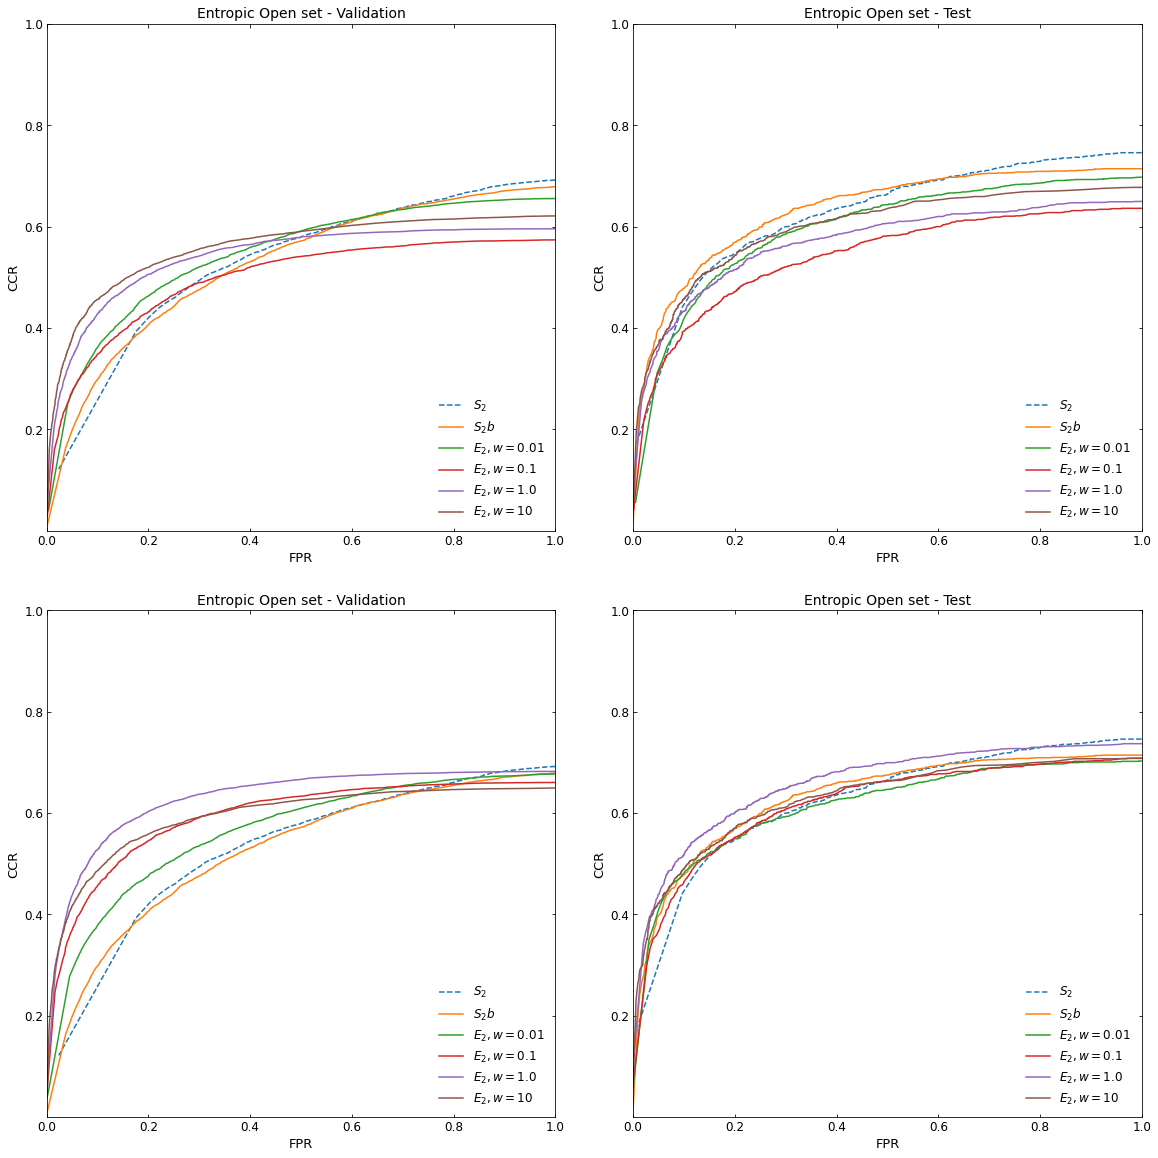

In [5]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
        # Baseline
        '$S_2$': hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        '$S_2b$': hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_best_val_arr.npz',
        # Entropic
        '$E_2, w=0.01$':hdir/'e2n_a0_w0.01_l1_t5_x0_e0_af/e2n_a0_w0.01_l1_t5_x0_e0_af_curr_val_arr.npz',
        '$E_2, w=0.1$':hdir/'e2n_a0_w0.1_l1_t5_x0_e0_af/e2n_a0_w0.1_l1_t5_x0_e0_af_curr_val_arr.npz',
        '$E_2, w=1.0$':hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_curr_val_arr.npz',
        '$E_2, w=10$':hdir/'e2n_a0_w10_l1_t5_x0_e0_af/e2n_a0_w10_l1_t5_x0_e0_af_curr_val_arr.npz',   
        #  Objectosphere
        # '$O_2, w=0.1, a=0.001$': hdir/'o2n_a0.001_w0.1_l1_t5_x10_e0_af/o2n_a0.001_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
        # '$O_2, w=0.1, a=0.01$': hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0_af/o2n_a0.01_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
        # '$O_2, w=0.1, a=0.1$': hdir/'o2n_a0.1_w0.1_l1_t5_x10_e0_af/o2n_a0.1_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',    
        # '$O_2, w=1.0, a=0.01$': hdir/'o2n_a0.01_w1_l1_t5_x10_e0_af/o2n_a0.01_w1_l1_t5_x10_e0_af_curr_val_arr.npz',
}
arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))
fig, ax = plt.subplots(2,2, figsize=(16,16), constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=4 / 72, h_pad=4 / 72, hspace=0.05, wspace=0.05)
axs = ax.flat
util.plot_oscr(arrays_curr,  split='val', scale='linear',use_norms=False, base_line=True, title='Entropic Open set - Validation', 
               linewidth=1.5, ax_label_font=13, ax=axs[0])
util.plot_oscr(arrays_test_curr, split='test', scale='linear',use_norms=False, base_line=True, title='Entropic Open set - Test',
               linewidth=1.5, ax_label_font=13, ax=axs[1])
util.plot_oscr(arrays_best,  split='val', scale='linear',use_norms=False, base_line=True, title='Entropic Open set - Validation',
               linewidth=1.5, ax_label_font=13, ax=axs[2])
util.plot_oscr(arrays_test_best, split='test', scale='linear',use_norms=False, base_line=True, title='Entropic Open set - Test',
               linewidth=1.5, ax_label_font=13, ax=axs[3])

### Entropic base histogram

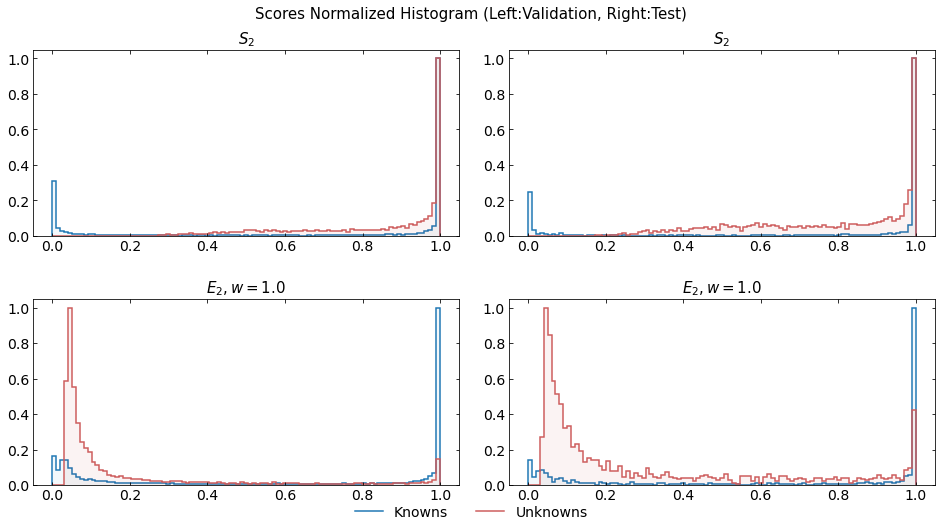

In [1]:
import util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import colors

hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
        # Baseline
        '$S_2$': hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        # Entropic
        #  '$E_2, w=0.01$':hdir/'e2n_a0_w0.01_l1_t5_x0_e0_af/e2n_a0_w0.01_l1_t5_x0_e0_af_curr_val_arr.npz',
        #  '$E_2, w=0.1$':hdir/'e2n_a0_w0.1_l1_t5_x0_e0_af/e2n_a0_w0.1_l1_t5_x0_e0_af_curr_val_arr.npz',
         '$E_2, w=1.0$':hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_curr_val_arr.npz',
        #  '$E_2, w=10$':hdir/'e2n_a0_w10_l1_t5_x0_e0_af/e2n_a0_w10_l1_t5_x0_e0_af_curr_val_arr.npz',
}
arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))
util.plot_histogram_val_test(arrays_best, arrays_test_best, metric='score', bins=100, figsize=(13,7), title='Scores Normalized Histogram (Left:Validation, Right:Test)',
                             split='test', font=14, sharex=True, sharey=False, log=False, normalized=True, linewidth=1.5)
# util.plot_histogram_val_test(arrays_best, arrays_test_best, metric='score', bins=50, figsize=(13,7), title='Normalized Score Histogram Validation - Test',
#                              split='test', font=14, sharex=True, sharey=False, log=False, normalized=True)
# util.plot_histogram_val_test(arrays_best, arrays_test_best, metric='norm', bins=100, figsize=(13,7), title='Absolute Features Norm Histogram Validation - Test',
#                              split='test', font=14, sharex=False, sharey=False, log=False, normalized=False)
# util.plot_histogram_val_test(arrays_best, arrays_test_best, metric='norm', bins=100, figsize=(13,7), title='Normalized Features Norm Histogram Validation - Test',
#                              split='test', font=14, sharex=False, sharey=False, log=False, normalized=True)


# Base Objectosphere

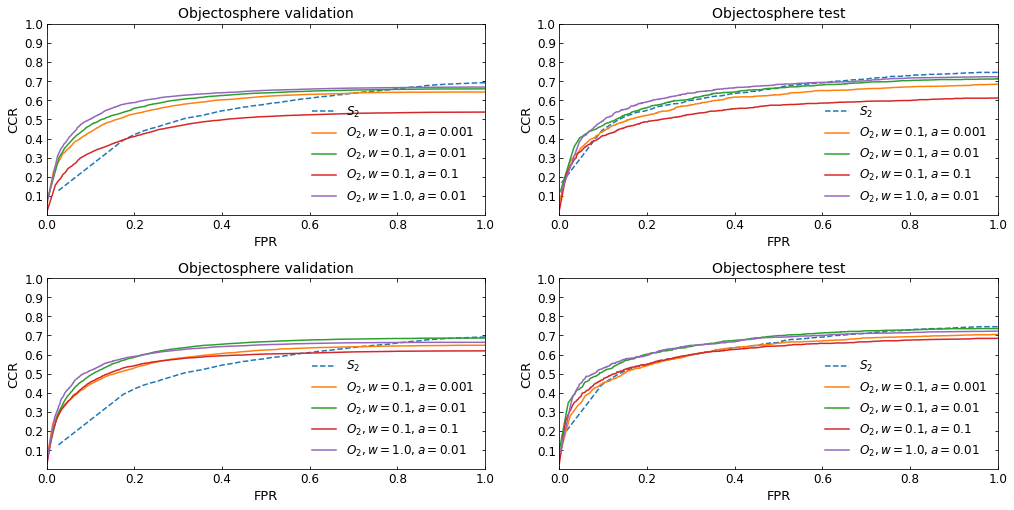

In [13]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
        # Baseline
        '$S_2$': hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        #  Objectosphere
        '$O_2, w=0.1, a=0.001$': hdir/'o2n_a0.001_w0.1_l1_t5_x10_e0_af/o2n_a0.001_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
        '$O_2, w=0.1, a=0.01$': hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0_af/o2n_a0.01_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
        '$O_2, w=0.1, a=0.1$': hdir/'o2n_a0.1_w0.1_l1_t5_x10_e0_af/o2n_a0.1_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',    
        '$O_2, w=1.0, a=0.01$': hdir/'o2n_a0.01_w1_l1_t5_x10_e0_af/o2n_a0.01_w1_l1_t5_x10_e0_af_curr_val_arr.npz',
}
arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))
fig, ax = plt.subplots(2,2, figsize=(14,7), constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=4 / 72, h_pad=4 / 72, hspace=0.05, wspace=0.05)
axs = ax.flat
util.plot_oscr(arrays_curr,  split='val', scale='linear',use_norms=False, base_line=True, title='Objectosphere validation', linewidth=1.5, ax_label_font=13, ax=axs[0])
util.plot_oscr(arrays_test_curr, split='test', scale='linear',use_norms=False, base_line=True, title='Objectosphere test', linewidth=1.5, ax_label_font=13, ax=axs[1])
util.plot_oscr(arrays_best,  split='val', scale='linear',use_norms=False, base_line=True, title='Objectosphere validation', linewidth=1.5, ax_label_font=13, ax=axs[2])
util.plot_oscr(arrays_test_best, split='test', scale='linear',use_norms=False, base_line=True, title='Objectosphere test', linewidth=1.5, ax_label_font=13, ax=axs[3])

### Objectosphere base histogram

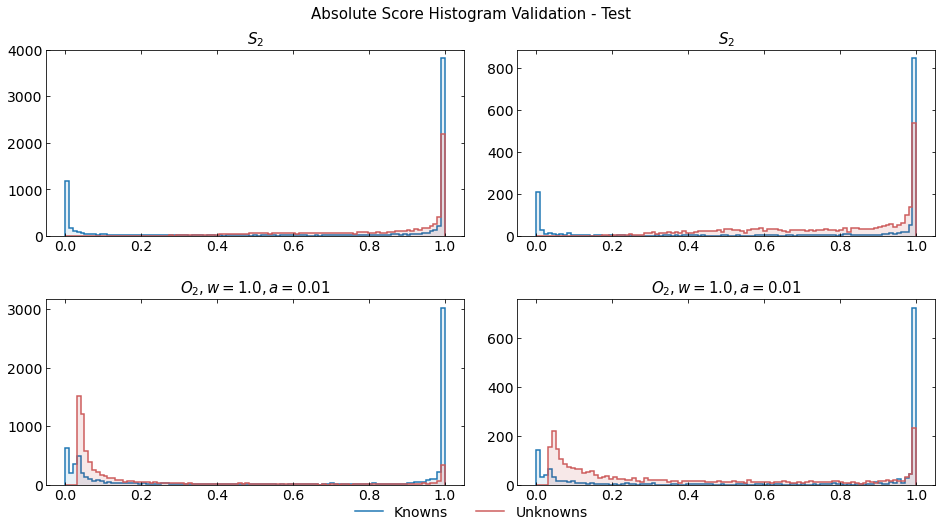

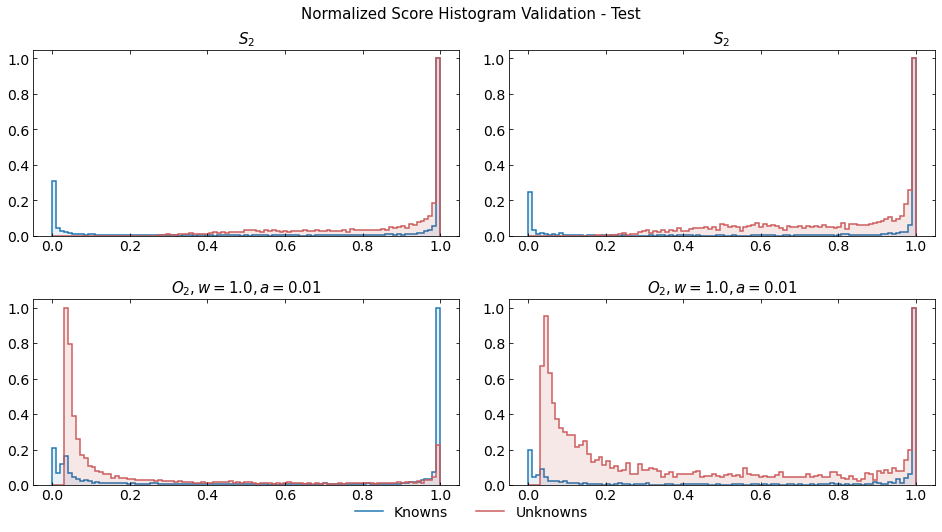

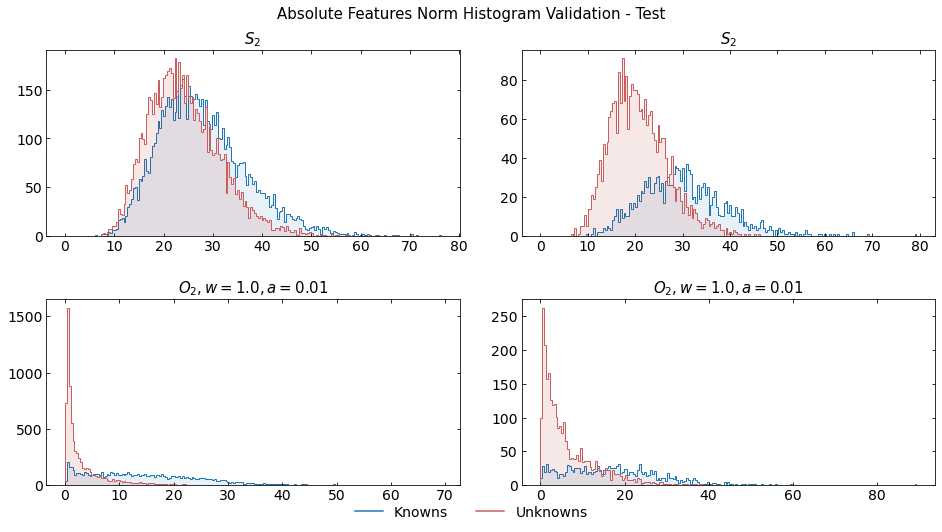

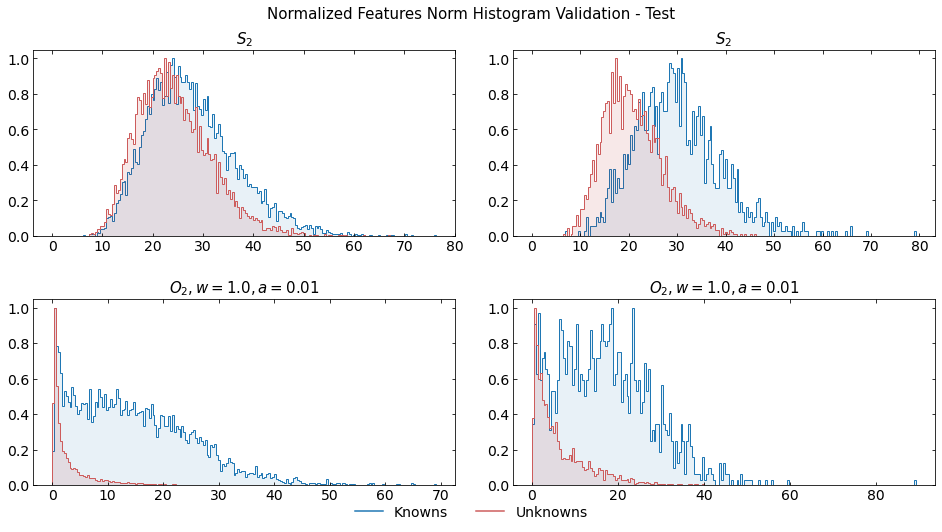

In [9]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
        # Baseline
        '$S_2$': hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        #  Objectosphere
        # '$O_2, w=0.1, a=0.001$': hdir/'o2n_a0.001_w0.1_l1_t5_x10_e0_af/o2n_a0.001_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
        # '$O_2, w=0.1, a=0.01$': hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0_af/o2n_a0.01_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
        # '$O_2, w=0.1, a=0.1$': hdir/'o2n_a0.1_w0.1_l1_t5_x10_e0_af/o2n_a0.1_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',    
        '$O_2, w=1.0, a=0.01$': hdir/'o2n_a0.01_w1_l1_t5_x10_e0_af/o2n_a0.01_w1_l1_t5_x10_e0_af_curr_val_arr.npz',
}
arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))

util.plot_histogram_val_test(arrays_curr, arrays_test_curr, metric='score', bins=100, figsize=(13,7), title='Absolute Score Histogram Validation - Test',
                             split='test', font=14, sharex=True, sharey=False, log=False, normalized=False, linewidth=1.5)
util.plot_histogram_val_test(arrays_curr, arrays_test_curr, metric='score', bins=100, figsize=(13,7), title='Normalized Score Histogram Validation - Test',
                             split='test', font=14, sharex=True, sharey=False, log=False, normalized=True, linewidth=1.5)
util.plot_histogram_val_test(arrays_curr, arrays_test_curr, metric='norm', bins=200, figsize=(13,7), title='Absolute Features Norm Histogram Validation - Test',
                             split='test', font=14, sharex=False, sharey=False, log=False, normalized=False, linewidth=1)
util.plot_histogram_val_test(arrays_curr, arrays_test_curr, metric='norm', bins=200, figsize=(13,7), title='Normalized Features Norm Histogram Validation - Test',
                             split='test', font=14, sharex=False, sharey=False, log=False, normalized=True, linewidth=1)

# Batch Normalisation Effect

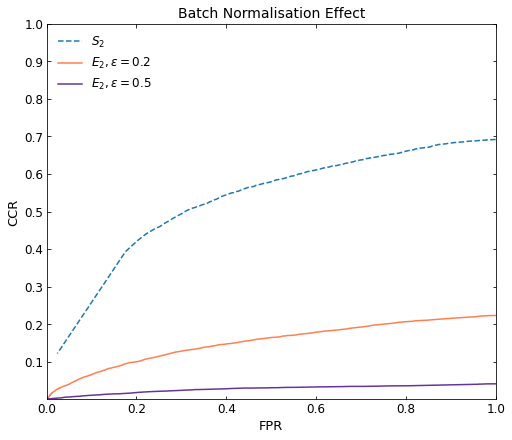

In [2]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
        # Baselines # The names are ignored, if you change them, then update the get_best_arrays function
        '$S_2$':    hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        # BN2 train mode always, with kn, kn-unk, adversarials, ST1: Training from start with kn-unk and adversarials
        '$E_2, \epsilon=0.2$':     hdir/'e2n_a0_w0.1_l1_t5_x0_e2_at_BN2ST1/e2n_a0_w0.1_l1_t5_x0_e2_at_BN2ST1_best_val_arr.npz',
        '$E_2, \epsilon=0.5$':       hdir/'e2n_a0_w0.1_l1_t5_x0_e5_at_BN2ST1/e2n_a0_w0.1_l1_t5_x0_e5_at_BN2ST1_best_val_arr.npz',
}
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))
colors = ['tab:blue', 'coral', 'rebeccapurple']
fig, ax = plt.subplots(1,1, figsize=(7,6), constrained_layout=True)
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True, colors=colors,
               title='Batch Normalisation Effect', linewidth=1.5, ax_label_font=13, ax=ax, legend_pos='upper left')

In [35]:
get_models_epochs(p2_files1, hdir)

,Name,epoch
0,$S_2$,45
1,"$E_2, w=1$",95
2,"$E_2, w=0.1, \epsilon=0.5$",81
3,"$E_2, w=1, \epsilon=0.01$",6
4,"$E_2, w=1, \epsilon=0.2$",104
5,"$E_2, w=1, \epsilon=0.8, \mu=0.8, n=10$",68
6,"$e_2, w=1, \epsilon=0.5, \mu=0.95, n=3$",83
7,"$e_2, w=1, \epsilon=0.8, \mu=0.62, n=20$",82
8,"$E_2, w=1, \epsilon=0.2, GN$",56


# Basic Adversarials

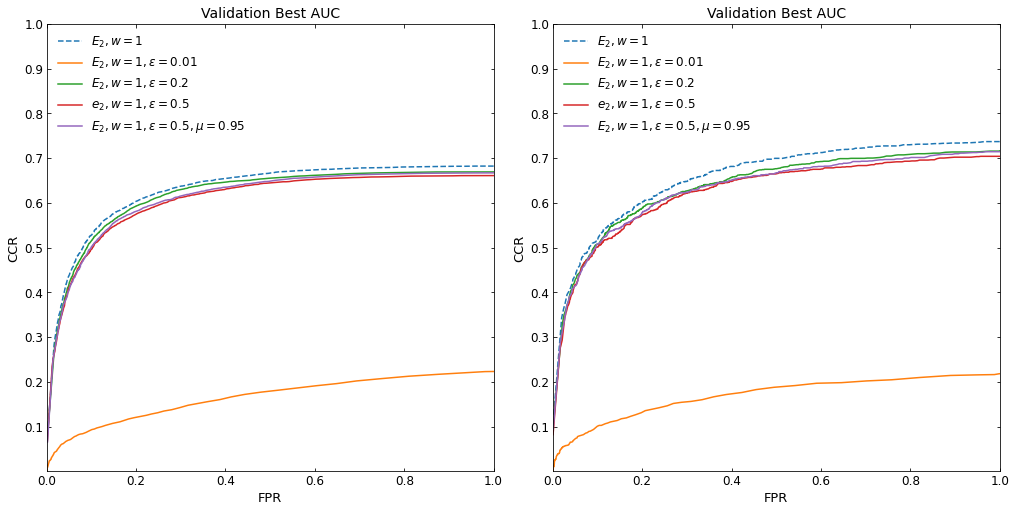

In [20]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
        # Baselines - The names are ignored, if you change them, then update the get_best_arrays function
        # '$S_2$':    hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        '$E_2, w=1$':    hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_curr_val_arr.npz',
        # Adversarials basic w=0.1
        # '$e_2, w=0.1, \epsilon=0.2$': hdir/'e2n_a0_w0.1_l1_t5_x0_e2_at/e2n_a0_w0.1_l1_t5_x0_e2_at_curr_val_arr.npz', 
        # '$E_2, w=0.1, \epsilon=0.5$': hdir/'e2n_a0_w0.1_l1_t5_x0_e5_at/e2n_a0_w0.1_l1_t5_x0_e5_at_curr_val_arr.npz',
        # '$e_2, w=0.1, \epsilon=0.8, \mu=0.78, n=10$': hdir/'e2n_a0_w0.1_l1_t5_x0_e8_at_mu0.78_wt10/e2n_a0_w0.1_l1_t5_x0_e8_at_mu0.78_wt10_curr_val_arr.npz',
        # # Adversarials basic w=1
        '$E_2, w=1, \epsilon=0.01$':    hdir/'e2n_a0_w1_l1_t5_x0_e0.1_at/e2n_a0_w1_l1_t5_x0_e0.1_at_curr_val_arr.npz',
        # '$e_2, w=1, \epsilon=0.1$':   hdir/'e2n_a0_w1_l1_t5_x0_e1_at/e2n_a0_w1_l1_t5_x0_e1_at_curr_val_arr.npz',
        '$E_2, w=1, \epsilon=0.2$':     hdir/'e2n_a0_w1_l1_t5_x0_e2_at/e2n_a0_w1_l1_t5_x0_e2_at_curr_val_arr.npz',
        '$e_2, w=1, \epsilon=0.5$':   hdir/'e2n_a0_w1_l1_t5_x0_e5_at/e2n_a0_w1_l1_t5_x0_e5_at_curr_val_arr.npz',
        # '$E_2, w=1, \epsilon=0.8, \mu=0.8, n=10$':      hdir/'e2n_a0_w1_l1_t5_x0_e8_at_mu0.8_wt10/e2n_a0_w1_l1_t5_x0_e8_at_mu0.8_wt10_curr_val_arr.npz',
        '$E_2, w=1, \epsilon=0.5, \mu=0.95$':    hdir/'e2n_a0_w1_l1_t5_x0_e5_at_mu0.95_wt3/e2n_a0_w1_l1_t5_x0_e5_at_mu0.95_wt3_curr_val_arr.npz',
        # '$e_2, w=1, \epsilon=0.8, \mu=0.62, n=20$':   hdir/'e2n_a0_w1_l1_t5_x0_e8_at_mu0.62_wt20/e2n_a0_w1_l1_t5_x0_e8_at_mu0.62_wt20_curr_val_arr.npz',
        # GN: Train with Gaussian Noise
        # '$E_2, w=1, \epsilon=0.2, GN$':    hdir/'e2n_a0_w1_l1_t5_x0_e2_at_GN02/e2n_a0_w1_l1_t5_x0_e2_at_GN02_curr_val_arr.npz',
        # '$e_2, w=1, \epsilon=0.7, GN$':  hdir/'e2n_a0_w1_l1_t5_x0_e7_at_GN07/e2n_a0_w1_l1_t5_x0_e7_at_GN07_curr_val_arr.npz',
        # BN1 train mode with kn and kn-unk, eval mode with adversarials
}

arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))

fig, ax = plt.subplots(1,2, figsize=(14,7), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True,
               title='Validation Best AUC', linewidth=1.5, ax_label_font=13, ax=axs[0], legend_pos='upper left')
util.plot_oscr(arrays_test_best, split='test', scale='linear', use_norms=False, base_line=True,
               title='Validation Best AUC', linewidth=1.5, ax_label_font=13, ax=axs[1], legend_pos='upper left')

## Fine tune softmax with Filtered adversarials - Entropic Loss

In [1]:
out = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/outputs')
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
    # Baselines # The names are ignored, if you change them, then update the get_best_arrays function
    '$S_2$':    hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
    '$E_2, w=1$':    hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_best_val_arr.npz',
    # Fine tune softmax with entropic random noise
    # '$E_2, \epsilon=0.1, S_{RN}^{filter}$': out/'e2n_a_w1_l1_e1_adam_d40_g0.3_filter_FSRN/e2n_a_w1_l1_e1_adam_d40_g0.3_filter_FSRN_curr_val_arr.npz',
    # '$E_2, \epsilon=0.2, S_{RN}^{filter}$': out/'e2n_a_w1_l1_e2_adam_d40_g0.3_filter_FSRN/e2n_a_w1_l1_e2_adam_d40_g0.3_filter_FSRN_curr_val_arr.npz',
    '$E_2, \epsilon=0.5, S_{RN}^{filter}$': out/'e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FSRN/e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FSRN_best_val_arr.npz',
    # Fine tune softmax with entropic adversarials
    '$E_2, \epsilon=0.1, S_{AD}^{filter}$': out/'e2n_a_w1_l1_e1_adam_d40_g0.3_filter_FSA/e2n_a_w1_l1_e1_adam_d40_g0.3_filter_FSA_curr_val_arr.npz',
    '$E_2, \epsilon=0.2, S_{AD}^{filter}$': out/'e2n_a_w1_l1_e2_adam_d40_g0.3_filter_FSA/e2n_a_w1_l1_e2_adam_d40_g0.3_filter_FSA_curr_val_arr.npz',
    '$E_2, \epsilon=0.5, S_{AD}^{filter}$': out/'e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FSA/e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FSA_curr_val_arr.npz',
    '$E_2, \epsilon=0.5, \mu=0.96, S_{AD}^{filter}$': out/'e2n_a_w1_l1_e5_adam_d40_g0.3_filter_mu0.96_wt3_FSA/e2n_a_w1_l1_e5_adam_d40_g0.3_filter_mu0.96_wt3_FSA_curr_val_arr.npz',
    }
arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))

fig, ax = plt.subplots(1,2, figsize=(14,7), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True,
               title='Last Epoch Validation', linewidth=1.5, ax_label_font=13, ax=axs[0], legend_pos='lower right')
util.plot_oscr(arrays_test_best, split='test', scale='linear', use_norms=False, base_line=True,
               title='Last Epoch Test', linewidth=1.5, ax_label_font=13, ax=axs[1], legend_pos='lower right')
get_models_epochs(p2_files1)


NameError: name 'Path' is not defined

## Fine tune softmax with Full adversarials - Entropic Loss

In [3]:
# General Experiments
out = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/outputs')
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
    # Baselines # The names are ignored, if you change them, then update the get_best_arrays function
    '$S_2$':    hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
    '$E_2, w=1$':    hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_best_val_arr.npz',
    # '$O_2, w=0.1, a=0.01$':    hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0_af/o2n_a0.01_w0.1_l1_t5_x10_e0_af_best_val_arr.npz',

    # Fine tune softmax with entropic random noise
    # '$E_2, \epsilon=0.1, S_{RN}^{full}$':   out/'e2n_a_w1_l1_e1_adam_d40_g0.3_full_FSRN/e2n_a_w1_l1_e1_adam_d40_g0.3_full_FSRN_curr_val_arr.npz',
    # '$E_2, \epsilon=0.2, S_{RN}^{full}$':   out/'e2n_a_w1_l1_e2_adam_d40_g0.3_full_FSRN/e2n_a_w1_l1_e2_adam_d40_g0.3_full_FSRN_curr_val_arr.npz',  
    '$E_2, \epsilon=0.5, S_{RN}^{full}$':   out/'e2n_a_w1_l1_e5_adam_d40_g0.3_full_FSRN/e2n_a_w1_l1_e5_adam_d40_g0.3_full_FSRN_curr_val_arr.npz',

    # Fine tune softmax with entropic adversarials
    '$E_2, \epsilon=0.1, S_{AD}^{full}$':   out/'e2n_a_w1_l1_e1_adam_d40_g0.3_full_FSA/e2n_a_w1_l1_e1_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    '$E_2, \epsilon=0.2, S_{AD}^{full}$':   out/'e2n_a_w1_l1_e2_adam_d40_g0.3_full_FSA/e2n_a_w1_l1_e2_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    '$E_2, \epsilon=0.5, S_{AD}^{full}$':   out/'e2n_a_w1_l1_e5_adam_d40_g0.3_full_FSA/e2n_a_w1_l1_e5_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    '$E_2, \epsilon=0.5, \mu=0.96, S_{AD}^{full}$':   out/'e2n_a_w1_l1_e5_adam_d40_g0.3_full_mu0.96_wt3_FSA/e2n_a_w1_l1_e5_adam_d40_g0.3_full_mu0.96_wt3_FSA_curr_val_arr.npz',
}
arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(p2_files1))

fig, ax = plt.subplots(1,2, figsize=(14,7), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True,
               title='Last Epoch Validation', linewidth=1.5, ax_label_font=13, ax=axs[0], legend_pos='lower right')
util.plot_oscr(arrays_test_best, split='test', scale='linear', use_norms=False, base_line=True,
               title='Last Epoch Test', linewidth=1.5, ax_label_font=13, ax=axs[1], legend_pos='lower right')
get_models_epochs(p2_files1)

FileNotFoundError: [Errno 2] No such file or directory: '/local/scratch/palechor/adversarialTraining/palechor_prod/runs/s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz'

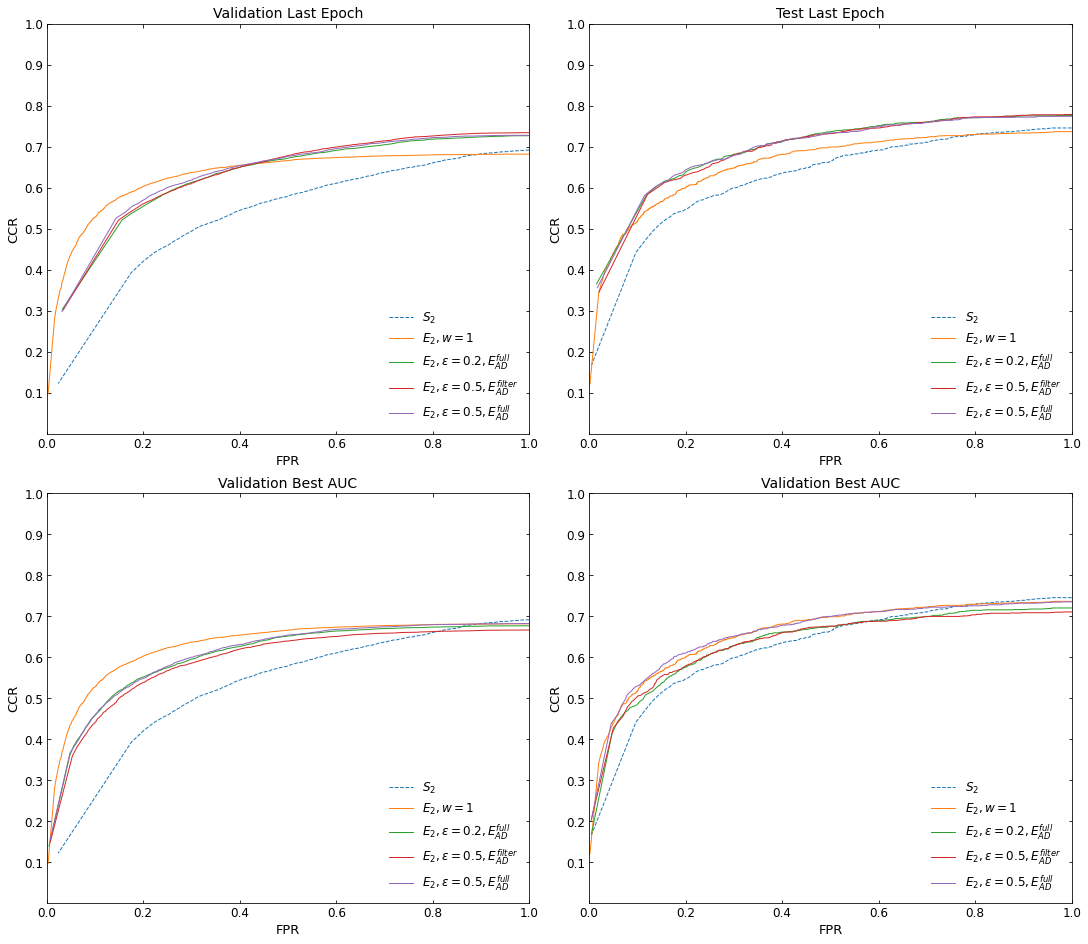

In [27]:
# General Experiments
out = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/outputs')
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')

p2_files1 = {
    # Baselines # The names are ignored, if you change them, then update the get_best_arrays function
    '$S_2$':    hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
    '$E_2, w=1$':    hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_best_val_arr.npz',
    # '$O_2, w=0.1, a=0.01$':    hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0_af/o2n_a0.01_w0.1_l1_t5_x10_e0_af_best_val_arr.npz',

    # Train entropic with adversarials from the start
    # '$E_2, w=0.1, \epsilon=0.5$': hdir/'e2n_a0_w0.1_l1_t5_x0_e5_at/e2n_a0_w0.1_l1_t5_x0_e5_at_curr_val_arr.npz',
    # '$E_2, w=1, \epsilon=0.5, p=0$': hdir/'e2n_a0_w1_l1_t5_x0_e5_at_FT1_PR0/e2n_a0_w1_l1_t5_x0_e5_at_FT1_PR0_curr_val_arr.npz',
    # '$E_2, w=1, \epsilon=0.5, p=33$': hdir/'e2n_a0_w1_l1_t5_x0_e5_at_FT1_PR33/e2n_a0_w1_l1_t5_x0_e5_at_FT1_PR33_curr_val_arr.npz',

    # Fine tune softmax with entropic random noise
    # '$E_2^{adam}, \epsilon=0.1, S_{RN}^{filter}$': out/'e2n_a_w1_l1_e1_adam_d40_g0.3_filter_FSRN/e2n_a_w1_l1_e1_adam_d40_g0.3_filter_FSRN_curr_val_arr.npz',
    # '$E_2^{adam}, \epsilon=0.2, S_{RN}^{filter}$': out/'e2n_a_w1_l1_e2_adam_d40_g0.3_filter_FSRN/e2n_a_w1_l1_e2_adam_d40_g0.3_filter_FSRN_curr_val_arr.npz',
    # '$E_2, \epsilon=0.5, S_{RN}^{filter}$': out/'e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FSRN/e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FSRN_best_val_arr.npz',
    # '$E_2, \epsilon=0.1, S_{RN}^{full}$':   out/'e2n_a_w1_l1_e1_adam_d40_g0.3_full_FSRN/e2n_a_w1_l1_e1_adam_d40_g0.3_full_FSRN_curr_val_arr.npz',
    # '$E_2, \epsilon=0.2, S_{RN}^{full}$':   out/'e2n_a_w1_l1_e2_adam_d40_g0.3_full_FSRN/e2n_a_w1_l1_e2_adam_d40_g0.3_full_FSRN_curr_val_arr.npz',  
    # '$E_2, \epsilon=0.5, S_{RN}^{full}$':   out/'e2n_a_w1_l1_e5_adam_d40_g0.3_full_FSRN/e2n_a_w1_l1_e5_adam_d40_g0.3_full_FSRN_curr_val_arr.npz',

    # Fine tune softmax with objectosphere random noise
    # '$O_2, \epsilon=0.1, S_{RN}^{filter}$': out/'o2n_a0.01_w0.1_l1_e1_adam_d40_g0.3_filter_FSRN/o2n_a0.01_w0.1_l1_e1_adam_d40_g0.3_filter_FSRN_curr_val_arr.npz',
    # '$O_2, \epsilon=0.2, S_{RN}^{filter}$': out/'o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_filter_FSRN/o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_filter_FSRN_curr_val_arr.npz',
    # '$O_2, \epsilon=0.5, S_{RN}^{filter}$': out/'o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_filter_FSRN/o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_filter_FSRN_curr_val_arr.npz',
    # '$O_2, \epsilon=0.1, S_{RN}^{full}$':   out/'o2n_a0.01_w0.1_l1_e1_adam_d40_g0.3_full_FSRN/o2n_a0.01_w0.1_l1_e1_adam_d40_g0.3_full_FSRN_curr_val_arr.npz',
    # '$O_2, \epsilon=0.2, S_{RN}^{full}$':   out/'o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_full_FSRN/o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_full_FSRN_curr_val_arr.npz',
    # '$O_2, \epsilon=0.5, S_{RN}^{full}$':   out/'o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_full_FSRN/o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_full_FSRN_curr_val_arr.npz',

    # Fine tune softmax with entropic adversarials
    # '$E_2, \epsilon=0.1, S_{AD}^{filter}$': out/'e2n_a_w1_l1_e1_adam_d40_g0.3_filter_FSA/e2n_a_w1_l1_e1_adam_d40_g0.3_filter_FSA_curr_val_arr.npz',
    # '$E_2, \epsilon=0.2, S_{AD}^{filter}$': out/'e2n_a_w1_l1_e2_adam_d40_g0.3_filter_FSA/e2n_a_w1_l1_e2_adam_d40_g0.3_filter_FSA_curr_val_arr.npz',
    # '$E_2, \epsilon=0.5, S_{AD}^{filter}$': out/'e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FSA/e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FSA_curr_val_arr.npz',
    # '$E_2, \epsilon=0.5, \mu=0.96, S_{AD}^{filter}$': out/'e2n_a_w1_l1_e5_adam_d40_g0.3_filter_mu0.96_wt3_FSA/e2n_a_w1_l1_e5_adam_d40_g0.3_filter_mu0.96_wt3_FSA_curr_val_arr.npz',
    # '$E_2, \epsilon=0.1, S_{AD}^{full}$':   out/'e2n_a_w1_l1_e1_adam_d40_g0.3_full_FSA/e2n_a_w1_l1_e1_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$E_2, \epsilon=0.2, S_{AD}^{full}$':   out/'e2n_a_w1_l1_e2_adam_d40_g0.3_full_FSA/e2n_a_w1_l1_e2_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$E_2, \epsilon=0.5, S_{AD}^{full}$':   out/'e2n_a_w1_l1_e5_adam_d40_g0.3_full_FSA/e2n_a_w1_l1_e5_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$E_2, \epsilon=0.5, \mu=0.96, S_{AD}^{full}$':   out/'e2n_a_w1_l1_e5_adam_d40_g0.3_full_mu0.96_wt3_FSA/e2n_a_w1_l1_e5_adam_d40_g0.3_full_mu0.96_wt3_FSA_curr_val_arr.npz',
    
    # Fine tune softmax with objectosphere adversarials
    # '$O_2, \epsilon=0.1, S_{AD}^{filter}$': out/'o2n_a0.01_w0.1_l1_e1_adam_d40_g0.3_filter_FSA/o2n_a0.01_w0.1_l1_e1_adam_d40_g0.3_filter_FSA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.2, S_{AD}^{filter}$': out/'o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_filter_FSA/o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_filter_FSA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.5, S_{AD}^{filter}$': out/'o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_filter_FSA/o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_filter_FSA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.5, \mu=0.96, S_{AD}^{filter}$': out/'o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_filter_mu0.96_wt3_FSA/o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_filter_mu0.96_wt3_FSA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.1, S_{AD}^{full}$': out/'o2n_a0.01_w0.1_l1_e1_adam_d40_g0.3_full_FSA/o2n_a0.01_w0.1_l1_e1_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.2, S_{AD}^{full}$': out/'o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_full_FSA/o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.5, S_{AD}^{full}$': out/'o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_full_FSA/o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.5, \mu=0.96, S_{AD}^{full}$': out/'o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_full_mu0.96_wt3_FSA/o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_full_mu0.96_wt3_FSA_curr_val_arr.npz',
    
    # Fine tune entropic with entropic adversarials 
    '$E_2, \epsilon=0.2, E_{AD}^{full}$':   out/'e2n_a_w1_l1_e2_adam_d40_g0.3_full_FEA/e2n_a_w1_l1_e2_adam_d40_g0.3_full_FEA_curr_val_arr.npz',
    '$E_2, \epsilon=0.5, E_{AD}^{filter}$': out/'e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FEA/e2n_a_w1_l1_e5_adam_d40_g0.3_filter_FEA_curr_val_arr.npz',
    '$E_2, \epsilon=0.5, E_{AD}^{full}$':   out/'e2n_a_w1_l1_e5_adam_d40_g0.3_full_FEA/e2n_a_w1_l1_e5_adam_d40_g0.3_full_FEA_curr_val_arr.npz',

    # Fine tune entropic with random noise FERN
    
    # Fine tune objecto with random noise FORN (optional)
    
    # Fine tune entropic with adversarials and unknowns FEAU
    
    # Fine tune objecto with adversarials and unknowns FOAU
    
    # Fine tune softmax with entropic adversarials and unknowns FSAU
    
    # Fine tune softmax withd objecto adversarials and unknowns FSAU

    # Fine tune objectos with objecto adversarials
    # '$O_2, \epsilon=0.2^{a0.01}, O_{AD}^{full}$':   out/'o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_filter_FOA/o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_filter_FOA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.2, O_{AD}^{full}$':   out/'o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_full_FOA/o2n_a0.01_w0.1_l1_e2_adam_d40_g0.3_full_FOA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.5, O_{AD}^{filter}$':   out/'o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_filter_FOA/o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_filter_FOA_curr_val_arr.npz',
    # '$O_2, \epsilon=0.5, O_{AD}^{full}$':   out/'o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_full_FOA/o2n_a0.01_w0.1_l1_e5_adam_d40_g0.3_full_FOA_curr_val_arr.npz',

}
arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))

arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))

fig, ax = plt.subplots(2,2, figsize=(15,13), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays_curr, split='val', scale='linear', use_norms=False, base_line=True,
               title='Validation Last Epoch', linewidth=1, ax_label_font=13, ax=axs[0])
util.plot_oscr(arrays_test_curr, split='test', scale='linear', use_norms=False, base_line=True,
               title='Test Last Epoch', linewidth=1, ax_label_font=13, ax=axs[1])
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True,
               title='Validation Best AUC', linewidth=1, ax_label_font=13, ax=axs[2])
util.plot_oscr(arrays_test_best, split='test', scale='linear', use_norms=False, base_line=True,
               title='Validation Best AUC', linewidth=1, ax_label_font=13, ax=axs[3])

### SGD vs ADAM, go ADAM!

In [ ]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files = {
        # Bases
        '$s_2$': hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        '$e_2, w=1$': hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_best_val_arr.npz',
        # FT3: Fine tune a softmax with adversarials, opt=SGD
        '$e_2, w=1, \epsilon=0.2, d=50, FSA_{sgd}^{full}$': hdir/'e2n_a0_w1_l1_t5_x0_e2_at_FT3_lrd50_full/e2n_a0_w1_l1_t5_x0_e2_at_FT3_lrd50_full_curr_val_arr.npz',
        '$e_2, w=1, \epsilon=0.2, d=50, FSA_{adam}^{full}$':  hdir/'e2n_a0_w1_l1_t5_x0_e2_at_FT4_lrd50_full/e2n_a0_w1_l1_t5_x0_e2_at_FT4_lrd50_full_curr_val_arr.npz',

        '$e_2, w=1, \epsilon=0.5, FSA_{sgd}^{crt}$':        hdir/'e2n_a0_w1_l0.1_t5_x0_e5_at_FT3/e2n_a0_w1_l0.1_t5_x0_e5_at_FT3_curr_val_arr.npz', # interesting
        '$e_2, w=1, \epsilon=0.5, FSA_{adam}^{crt}$':      hdir/'e2n_a0_w1_l1_t5_x0_e5_at_FT4/e2n_a0_w1_l1_t5_x0_e5_at_FT4_curr_val_arr.npz',  # interesting
}
arrays1 = util.read_array_list(p2_files)
# arrays2= util.read_array_list(transform_to_test(p2_files))
fig, ax = plt.subplots(1,1, figsize=(10,5), constrained_layout=True)
axs = [ax]
util.plot_oscr(arrays1, split='val', scale='linear', use_norms=False, base_line=True,
               title='OSCR Validation', linewidth=1, ax_label_font=13, ax=axs[0])
# plot_oscr(arrays2, split='test', scale='linear', use_norms=False, base_line=True, title='OSCR Test', linewidth=1, ax_label_font=13, ax=axs[1])
figures_path = Path('~/code/adversarialTraining/figures')
# plt.savefig()

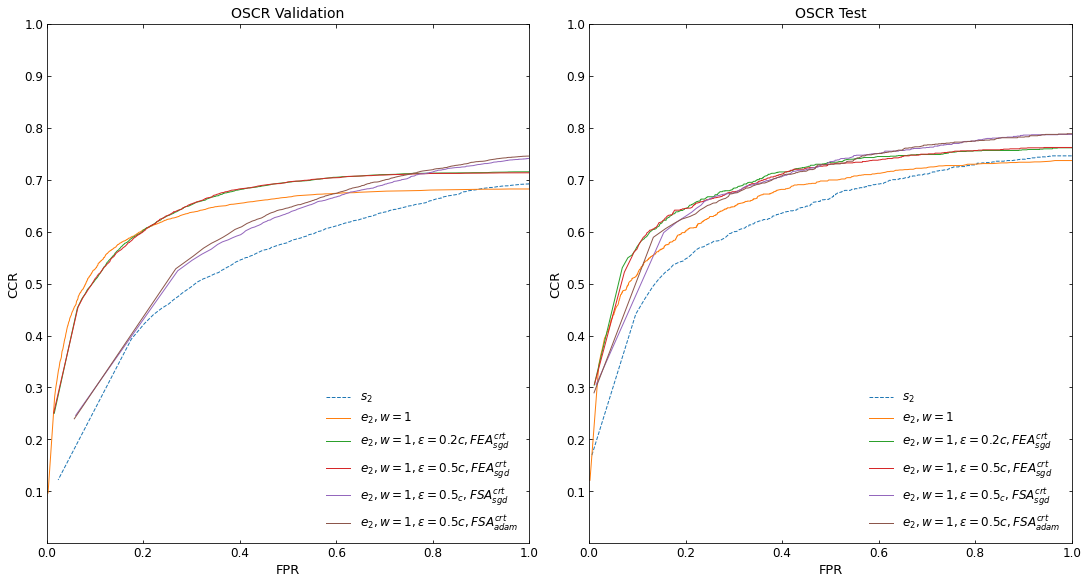

In [26]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files = {
        # Bases
        '$s_2$': hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        '$e_2, w=1$': hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_best_val_arr.npz',
        
        # FEGN: Fine tune an entropic with adversarials as gaussian noise, opt adam
        # '$e_2, w=1, std=0.2c, FEGN_{adam}^{crt}$': hdir/'e2n_a0_w1_l1_t5_x0_e0_at_std0.2_FEGN_lrd30_filter/e2n_a0_w1_l1_t5_x0_e0_at_std0.2_FEGN_lrd30_filter_curr_val_arr.npz',

        # FSGN: Fine tune a softmax with adversarials as gaussian noise, opt adam
        # '$e_2, w=1, std=0.2c, FSGN_{adam}^{crt}$': hdir/'e2n_a0_w1_l1_t5_x0_e0_at_std0.2_FSGN_lrd30_filter/e2n_a0_w1_l1_t5_x0_e0_at_std0.2_FSGN_lrd30_filter_curr_val_arr.npz',
        
        # FSRN: Fine tune a softmax with adversarials as random noise
        
        # FT1: Train only with knowns, add adversarials from epoch PR.
        # '$e_2, w=0.1, e=0.1, p=0, EK1$':      hdir/'e2n_a0_w0.1_l1_t5_x0_e1_at_FT1_PR0/e2n_a0_w0.1_l1_t5_x0_e1_at_FT1_PR0_best_val_arr.npz', # not interesting
        # '$e_2, w=0.1, e=0.5, p=0, EK1$':      hdir/'e2n_a0_w0.1_l1_t5_x0_e5_at_FT1_PR0/e2n_a0_w0.1_l1_t5_x0_e5_at_FT1_PR0_best_val_arr.npz', # not interesting
        # '$e_2, w=1.0, e=0.5, p=0, EK1$':      hdir/'e2n_a0_w1_l1_t5_x0_e5_at_FT1_PR0/e2n_a0_w1_l1_t5_x0_e5_at_FT1_PR0_curr_val_arr.npz', # interesting against base softmax
        # '$e_2, w=1.0, e=0.5, p=33, EK1$':     hdir/'e2n_a0_w1_l1_t5_x0_e5_at_FT1_PR33/e2n_a0_w1_l1_t5_x0_e5_at_FT1_PR33_curr_val_arr.npz', # interesting against base softmax
        
        # # FT2: Fine tune a entropic/objecto sphere with adversarials,  opt=SGD
        '$e_2, w=1, \epsilon=0.2c, FEA_{sgd}^{crt}$':        hdir/'e2n_a0_w1_l0.1_t5_x0_e2_at_FT2A/e2n_a0_w1_l0.1_t5_x0_e2_at_FT2A_curr_val_arr.npz', # interesting
        '$e_2, w=1, \epsilon=0.5c, FEA_{sgd}^{crt}$':        hdir/'e2n_a0_w1_l0.1_t5_x0_e5_at_FT2B/e2n_a0_w1_l0.1_t5_x0_e5_at_FT2B_curr_val_arr.npz', # interesting  
        # '$e_2, w=1, \epsilon=0.7, FEA_{sgd}^{crt}$':        hdir/'e2n_a0_w1_l0.1_t5_x0_e7_at_FT2C/e2n_a0_w1_l0.1_t5_x0_e7_at_FT2C_curr_val_arr.npz', # interesting
        # # '$e_2, w=1, \epsilon=0.8, \mu=0.5, n=10, FEA_{sgd}^{crt}$': hdir/'e2n_a0_w1_l0.1_t5_x0_e8_at_mu0.5_wt10_FT2D/e2n_a0_w1_l0.1_t5_x0_e8_at_mu0.5_wt10_FT2D_20_val_arr.npz', # interesting
        # # '$e_2, w=1, \epsilon=0.2c, d=40, FEA_{sgd}^{crt}$':    hdir/'e2n_a0_w1_l1_t5_x0_e2_at_FT2E_lrd40/e2n_a0_w1_l1_t5_x0_e2_at_FT2E_lrd40_curr_val_arr.npz',
        
        # # FT3: Fine tune a softmax with adversarials, opt=SGD
        # # '$e_2, w=1, \epsilon=0.2c, d=50, FSA_{sgd}^{full}$': hdir/'e2n_a0_w1_l1_t5_x0_e2_at_FT3_lrd50_full/e2n_a0_w1_l1_t5_x0_e2_at_FT3_lrd50_full_curr_val_arr.npz',
        # '$e_2, w=1, \epsilon=0.5_c, FSA_{sgd}^{crt}$':        hdir/'e2n_a0_w1_l0.1_t5_x0_e5_at_FT3/e2n_a0_w1_l0.1_t5_x0_e5_at_FT3_curr_val_arr.npz', # interesting

        # # FT4: Fine tune a softmax with adversarials, opt=adam, decaying LR
        # # '$e_2, w=1, \epsilon=0.01c, FSA_{adam}^{crt}$':     hdir/'e2n_a0_w1_l1_t5_x0_e0.1_at_FT4/e2n_a0_w1_l1_t5_x0_e0.1_at_FT4_curr_val_arr.npz',
        # # '$e_2, w=1, \epsilon=0.1c, FSA_{adam}^{crt}$':      hdir/'e2n_a0_w1_l1_t5_x0_e1_at_FT4/e2n_a0_w1_l1_t5_x0_e1_at_FT4_curr_val_arr.npz',  # interesting
        '$e_2, w=1, \epsilon=0.5c, FSA_{adam}^{crt}$':      hdir/'e2n_a0_w1_l1_t5_x0_e5_at_FT4/e2n_a0_w1_l1_t5_x0_e5_at_FT4_curr_val_arr.npz',  # interesting
        # # '$e_2, w=1, \epsilon=0.2c, d=50,FSA_{adam}^{full}$':  hdir/'e2n_a0_w1_l1_t5_x0_e2_at_FT4_lrd50_full/e2n_a0_w1_l1_t5_x0_e2_at_FT4_lrd50_full_curr_val_arr.npz',
        # '$e_1, w=1, \epsilon=0.5c, d=40, FSA_{adam}^{full}$': hdir/'e1n_a0.01_w0.1_l1_t5_x10_e5_at_FT4_lrd40_full/e1n_a0.01_w0.1_l1_t5_x10_e5_at_FT4_lrd40_full_best_val_arr.npz',
}

arrays1 = util.read_array_list(p2_files)
arrays2= util.read_array_list(util.transform_to_test(p2_files))
fig, ax = plt.subplots(1,2, figsize=(15,8), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays1, split='val', scale='linear', use_norms=False, base_line=True,
               title='OSCR Validation', linewidth=1, ax_label_font=13, ax=axs[0])
util.plot_oscr(arrays2, split='test', scale='linear', use_norms=False, base_line=True,
               title='OSCR Test', linewidth=1, ax_label_font=13, ax=axs[1])
figures_path = Path('~/code/adversarialTraining/figures')
# plt.savefig()

# util.plot_histogram_val_test(arrays1, arrays2, metric='score', bins=300, figsize=(15,12), sharex=True, sharey=True)
# util.plot_histogram_val_test(arrays1, arrays2, metric='norm', bins=300, figsize=(15,12), sharex=True, sharey=True)

# Feature Space Visualization

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import cm

hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files = {'Entropic':   hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_best_test_arr.npz',
            'Softmax':   hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_test_arr.npz',
            'Objectosphere':   hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0_af/o2n_a0.01_w0.1_l1_t5_x10_e0_af_best_test_arr.npz',
            'S_FT4': hdir/'e2n_a0_w1_l0.1_t5_x0_e5_at_FT3/e2n_a0_w1_l0.1_t5_x0_e5_at_FT3_best_test_arr.npz', 
}

arrays = util.read_array_list(p2_files)
fig, ax  = plt.subplots(2,2, figsize=(15,10), constrained_layout=True, sharex=True, sharey=True)
ax = ax.flat
for (idx,(key, array)) in enumerate(arrays.items()):
    features = array['features']
    targets = array['gt']
    sample_idx = np.random.choice(np.arange(len(targets)), size=len(targets), replace=False)
    # sample_idx = np.random.randint(0, features.shape[0], size=len(targets), dtype=int)
    
    features = features[sample_idx]
    targets =  targets[sample_idx]
    unk = targets == -1
    targets[unk] = np.max(targets) + 1
    
    unkunk = targets == -2
    targets[unkunk] = np.max(targets) + 1
    pca = PCA(n_components=2, svd_solver='full')
    x = pca.fit(features).transform(features)
    # print(pca.explained_variance_ratio_*100)
    cmaplist =  cm.get_cmap('gist_stern_r', len(np.unique(targets)))
    alpha = 0.8
    alphas = np.ones_like(targets)
    alphas[unk] = alpha
    alphas[unkunk] = alpha
    ax[idx].scatter(x[:,0], x[:,1], c=targets[:], s=10, alpha= alphas, cmap=cmaplist, marker='.')
    ax[idx].set_title(key)
    


# Protocol 2 Objectosphere adversarials no pretraining

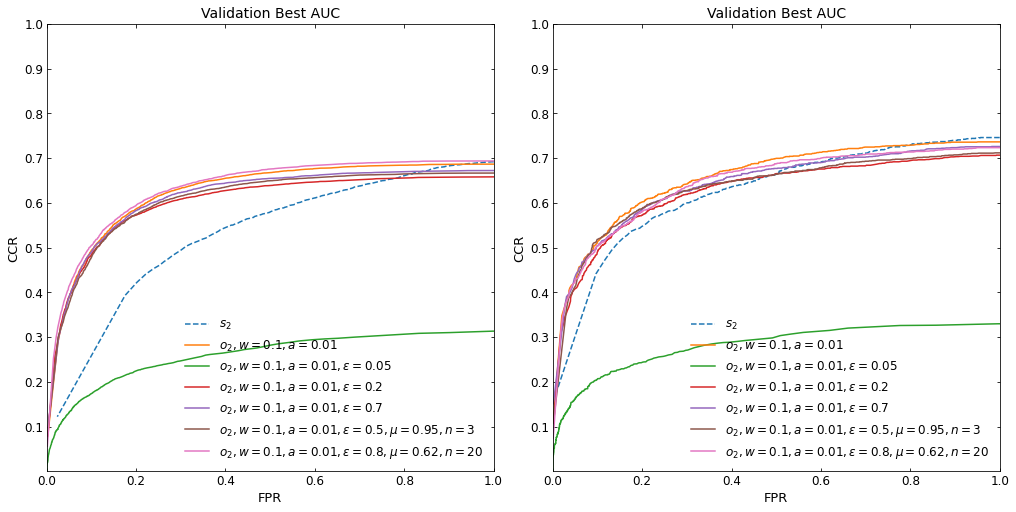

In [19]:
import util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import colors

hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
        # base:
        '$s_2$': hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        # '$e_2, w=1$': hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_best_val_arr.npz',
        '$o_2, w=0.1, a=0.01$':   hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0_af/o2n_a0.01_w0.1_l1_t5_x10_e0_af_best_val_arr.npz',
        
        # simple adversarials:
        # '$o_2, w=0.1, a=0.01, \epsilon=0.01$':  hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0.1_at/o2n_a0.01_w0.1_l1_t5_x10_e0.1_at_best_val_arr.npz',
        '$o_2, w=0.1, a=0.01, \epsilon=0.05$':  hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0.5_at/o2n_a0.01_w0.1_l1_t5_x10_e0.5_at_best_val_arr.npz',
        '$o_2, w=0.1, a=0.01, \epsilon=0.2$': hdir/'o2n_a0.01_w0.1_l1_t5_x10_e2_at/o2n_a0.01_w0.1_l1_t5_x10_e2_at_best_val_arr.npz', # running
        
        # '$o_2, w=1, a=0.01, \epsilon=0.5$':     hdir/'o2n_a0.01_w1_l1_t5_x10_e5_at/o2n_a0.01_w1_l1_t5_x10_e5_at_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.1, \epsilon=0.5$':    hdir/'o2n_a0.1_w0.1_l1_t5_x10_e5_at/o2n_a0.1_w0.1_l1_t5_x10_e5_at_best_val_arr.npz',
        '$o_2, w=0.1, a=0.01, \epsilon=0.7$':   hdir/'o2n_a0.01_w0.1_l1_t5_x10_e7_at/o2n_a0.01_w0.1_l1_t5_x10_e7_at_best_val_arr.npz',
        '$o_2, w=0.1, a=0.01, \epsilon=0.5, \mu=0.95, n=3$':   hdir/'o2n_a0.01_w0.1_l1_t5_x10_e5_at_mu0.95_wt3/o2n_a0.01_w0.1_l1_t5_x10_e5_at_mu0.95_wt3_best_val_arr.npz',
        
        # '$o_2, w=1, a=0.01, \epsilon=0.8, \mu=0.8, n=10$':     hdir/'o2n_a0.01_w1_l1_t5_x10_e8_at_mu0.8_wt10/o2n_a0.01_w1_l1_t5_x10_e8_at_mu0.8_wt10_best_val_arr.npz',
        '$o_2, w=0.1, a=0.01, \epsilon=0.8, \mu=0.62, n=20$':     hdir/'o2n_a0.01_w0.1_l1_t5_x10_e8_at_mu0.62_wt20/o2n_a0.01_w0.1_l1_t5_x10_e8_at_mu0.62_wt20_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.01, \epsilon=0.8, \mu=0.8, n=10$': hdir/'o2n_a0.01_w0.1_l1_t5_x10_e8_at_mu0.8_wt10/o2n_a0.01_w0.1_l1_t5_x10_e8_at_mu0.8_wt10_best_val_arr.npz',

        # GN Training with unknowns and adversarials as gaussian noise
        # '$o_2, w=0.1, a=0.01, std=0.2, GN$': hdir/'o2n_a0.01_w0.1_l1_t5_x10_e2_at_GN02/o2n_a0.01_w0.1_l1_t5_x10_e2_at_GN02_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.01, std=0.7, GN$': hdir/'o2n_a0.01_w0.1_l1_t5_x10_e7_at_GN07/o2n_a0.01_w0.1_l1_t5_x10_e7_at_GN07_best_val_arr.npz',
}

arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))

fig, ax = plt.subplots(1,2, figsize=(14,7), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True,
               title='Validation Best AUC', linewidth=1.5, ax_label_font=13, ax=axs[0], legend_pos='lower right')
util.plot_oscr(arrays_test_best, split='test', scale='linear', use_norms=False, base_line=True,
               title='Validation Best AUC', linewidth=1.5, ax_label_font=13, ax=axs[1], legend_pos='lower right')
# plt.legend(bbox_to_anchor=(1.7, 1), loc="upper right", ncol=1, fontsize=12, fancybox=True, shadow=True)
plt.show()

## Protocol 2 Objectosphere Adversarials pre training

In [ ]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
p2_files1 = {
        # Baselines:
        '$s_2$':hdir/'s2_a0_w0_l1_t8_x0_e0_af/s2_a0_w0_l1_t8_x0_e0_af_119_val_arr.npz',
        # 'e2, w=1':hdir/'e2n_a0_w1_l1_t5_x0_e0_af/e2n_a0_w1_l1_t5_x0_e0_af_best_val_arr.npz',
        '$o_2, w=0.1, a=0.01$':hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0_af/o2n_a0.01_w0.1_l1_t5_x10_e0_af_best_val_arr.npz',
        # 'o2, w=0.1, a=0.1':hdir/'o2n_a0.1_w0.1_l1_t5_x10_e0_af/o2n_a0.1_w0.1_l1_t5_x10_e0_af_best_val_arr.npz',
        # 'o2, w=1, a=0.01':hdir/'o2n_a0.01_w1_l1_t5_x10_e0_af/o2n_a0.01_w1_l1_t5_x10_e0_af_best_val_arr.npz',
        
        # Simple Adversarials
        # '$o_2, w=0.1, a=0.01, \epsilon=0.01$':  hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0.1_at/o2n_a0.01_w0.1_l1_t5_x10_e0.1_at_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.01, \epsilon=0.05$':  hdir/'o2n_a0.01_w0.1_l1_t5_x10_e0.5_at/o2n_a0.01_w0.1_l1_t5_x10_e0.5_at_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.01, \epsilon=0.2$': hdir/'o2n_a0.01_w0.1_l1_t5_x10_e2_at/o2n_a0.01_w0.1_l1_t5_x10_e2_at_best_val_arr.npz', # running
        # '$o_2, w=1, a=0.01, \epsilon=0.5$':     hdir/'o2n_a0.01_w1_l1_t5_x10_e5_at/o2n_a0.01_w1_l1_t5_x10_e5_at_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.1, \epsilon=0.5$':    hdir/'o2n_a0.1_w0.1_l1_t5_x10_e5_at/o2n_a0.1_w0.1_l1_t5_x10_e5_at_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.01, \epsilon=0.7$':   hdir/'o2n_a0.01_w0.1_l1_t5_x10_e7_at/o2n_a0.01_w0.1_l1_t5_x10_e7_at_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.01, \epsilon=0.5, \mu=0.95, n=3$':   hdir/'o2n_a0.01_w0.1_l1_t5_x10_e5_at_mu0.95_wt3/o2n_a0.01_w0.1_l1_t5_x10_e5_at_mu0.95_wt3_best_val_arr.npz',
        # '$o_2, w=1, a=0.01, \epsilon=0.8, \mu=0.8, n=10$':     hdir/'o2n_a0.01_w1_l1_t5_x10_e8_at_mu0.8_wt10/o2n_a0.01_w1_l1_t5_x10_e8_at_mu0.8_wt10_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.01, \epsilon=0.8, \mu=0.62, n=20$':     hdir/'o2n_a0.01_w0.1_l1_t5_x10_e8_at_mu0.62_wt20/o2n_a0.01_w0.1_l1_t5_x10_e8_at_mu0.62_wt20_best_val_arr.npz',
        # '$o_2, w=0.1, a=0.01, \epsilon=0.8, \mu=0.8, n=10$': hdir/'o2n_a0.01_w0.1_l1_t5_x10_e8_at_mu0.8_wt10/o2n_a0.01_w0.1_l1_t5_x10_e8_at_mu0.8_wt10_best_val_arr.npz',
  
        # FT1: Pretrain the network with knowns for PR epochs, then add adversarials as unknowns
        # '$o_2, w=0.1, a=0.01, \epsilon=0.5, p=0, FT1$':hdir/'o2n_a0.01_w0.1_l1_t5_x10_e5_at_FT1_PR0/o2n_a0.01_w0.1_l1_t5_x10_e5_at_FT1_PR0_best_val_arr.npz',
        '$o_2, w=0.1, a=0.01, \epsilon=0.5, p=33, FT1$':hdir/'o2n_a0.01_w0.1_l1_t5_x10_e5_at_FT1_PR33/o2n_a0.01_w0.1_l1_t5_x10_e5_at_FT1_PR33_curr_val_arr.npz',
     
        # FT2: Fine tune a entropic/objectosphere with adversarials,  opt=SGD, using filter
        # '$o_2, w=0.1b, a=0.01, \epsilon=0.2, FT2$':hdir/'o2n_a0.01_w0.1_l0.1_t5_x10_e2_at_FT2A/o2n_a0.01_w0.1_l0.1_t5_x10_e2_at_FT2A_best_val_arr.npz',
        # '$o_2, w=0.1c, a=0.01, \epsilon=0.2, FT2$':hdir/'o2n_a0.01_w0.1_l0.1_t5_x10_e2_at_FT2A/o2n_a0.01_w0.1_l0.1_t5_x10_e2_at_FT2A_curr_val_arr.npz',
        '$o_2, w=0.1b, a=0.01, \epsilon=0.5, FT2$':hdir/'o2n_a0.01_w0.1_l0.1_t5_x10_e5_at_FT2B/o2n_a0.01_w0.1_l0.1_t5_x10_e5_at_FT2B_best_val_arr.npz',
        '$o_2, w=0.1c, a=0.01, \epsilon=0.5, FT2$':hdir/'o2n_a0.01_w0.1_l0.1_t5_x10_e5_at_FT2B/o2n_a0.01_w0.1_l0.1_t5_x10_e5_at_FT2B_curr_val_arr.npz',

        # '$o_2, w=0.1, a=0.01, \epsilon=0.7, FT2$': hdir/'o2n_a0.01_w0.1_l0.1_t5_x10_e7_at_FT2C/o2n_a0.01_w0.1_l0.1_t5_x10_e7_at_FT2C_ep20_val_arr.npz',
        # '$o_2, w=0.1, a=0.01, \epsilon=0.8, \mu=0.5, n=10, FT2$': hdir/'o2n_a0.01_w0.1_l0.1_t5_x10_e8_at_mu0.5_wt10_FT2D/o2n_a0.01_w0.1_l0.1_t5_x10_e8_at_mu0.5_wt10_FT2D_ep20_val_arr.npz',

}

arrays_curr = util.read_array_list(p2_files1)
arrays_test_curr = util.read_array_list(util.transform_to_test(p2_files1))
arrays_best = util.read_array_list(util.get_best_arrays(p2_files1))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p2_files1)))

fig, ax = plt.subplots(1,2, figsize=(14,7), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True,
               title='Validation Best AUC', linewidth=1.5, ax_label_font=13, ax=axs[0], legend_pos='lower right')
util.plot_oscr(arrays_test_best, split='test', scale='linear', use_norms=False, base_line=True,
               title='Validation Best AUC', linewidth=1.5, ax_label_font=13, ax=axs[1], legend_pos='lower right')
# plt.legend(bbox_to_anchor=(1.7, 1), loc="upper right", ncol=1, fontsize=12, fancybox=True, shadow=True)
plt.show()

## Protocol 3

,split,classes,size,kn size,kn (%),kn_unk size,kn_unk (%),unk_unk size,unk_unk (%)
0,train,153,255022,156247,61.3%,98775,38.7%,0,0.0%
1,val,153,63764,39066,61.3%,24698,38.7%,0,0.0%
2,test,154,20600,7600,36.9%,4850,23.5%,8150,39.6%


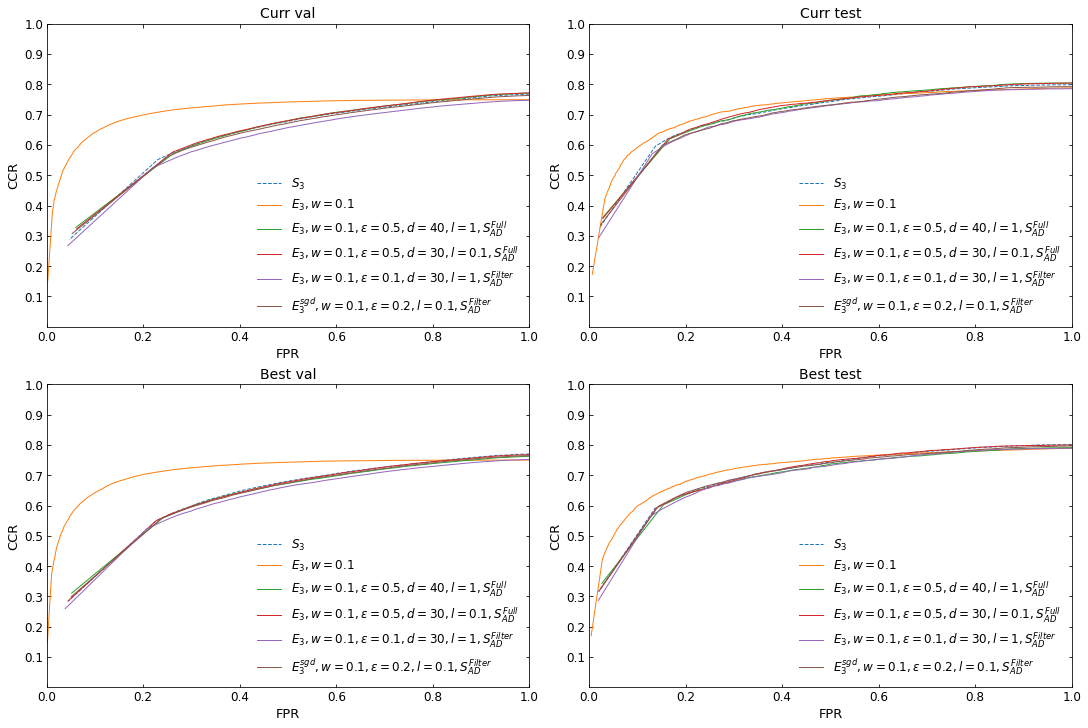

In [ ]:
Histogram Idea



normalized = False
fig, ax = plt.subplots(2,1, figsize=(6,6))
for idx, (exp_name, array) in enumerate(arrays_curr.items()):
    score = array['scores']
    gt = array['gt'].astype(np.int64)
    feat = array['features']
    norms = np.linalg.norm(feat, axis=1)
    kn = (gt >= 0)
    unk = (gt == -1)

    kn_scores = score[kn, gt[kn]]
    unk_scores = np.amax(score[unk], axis=1)
    kn_norms = norms[kn]
    unk_norms = norms[unk]
    kn_metric, unk_metric = kn_scores, unk_scores
    start = min(np.min(kn_scores), np.min(unk_scores))
    print(start)
    
    end = max(np.max(kn_scores), np.max(unk_scores))
    bins = np.linspace(start, 1, num=500)
    hist_kn, _ = np.histogram(kn_metric, bins)
    hist_unk, _ = np.histogram(unk_metric, bins)
    if normalized:
        # max_val = max(np.max(hist_kn), np.max(hist_unk))
        hist_kn = hist_kn/np.max(hist_kn)
        hist_unk = hist_unk/np.max(hist_unk)
        # hist_kn = hist_kn/max_val
        # hist_unk = hist_unk/max_val
    # Custom plot
    ax[idx].stairs(hist_kn, bins, fill=True, color='tab:blue', edgecolor='tab:blue', alpha=0.2)
    ax[idx].stairs(hist_unk, bins, fill=True, color='tab:red', edgecolor='tab:red', alpha=0.2)
    # ax[idx].set_yscale('log')
    # ax[idx].set_xscale('log')